In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-population/IndiaPopulation_2021.csv


# Reading data

In [3]:
train_df = pd.read_csv("/kaggle/input/indian-population/IndiaPopulation_2021.csv")

In [6]:
train_df.head(10)

,Year,Population,GrowthRate
0,2021,1393409038,0.97
1,2020,1380004385,0.99
2,2019,1366417754,1.02
3,2018,1352642280,1.04
4,2017,1338676785,1.07
5,2016,1324517249,1.10
6,2015,1310152403,1.12
7,2014,1295600772,1.15
8,2013,1280842125,1.19
9,2012,1265780247,1.24


In [7]:
train_df.describe()

,Year,Population,GrowthRate
count,72.00000,7.200000e+01,72.000000
mean,1985.50000,8.289174e+08,1.835833
std,20.92845,3.243571e+08,0.467103
min,1950.00000,3.763252e+08,0.000000
25%,1967.75000,5.287355e+08,1.605000
50%,1985.50000,7.931676e+08,1.940000
75%,2003.25000,1.116048e+09,2.187500
max,2021.00000,1.393409e+09,2.360000


# Summarising data

In [10]:
print(len(train_df))
summary = pd.DataFrame(train_df.dtypes)
summary["Null"] = train_df.isnull().sum()
summary["first"] = train_df.loc[0]
summary["second"] = train_df.loc[1]
summary["third"] = train_df.loc[2]
summary["unique"] = train_df.nunique()
summary

72


,0,Null,first,second,third,unique
Year,int64,0,2.021000e+03,2.020000e+03,2.019000e+03,72
Population,int64,0,1.393409e+09,1.380004e+09,1.366418e+09,72
GrowthRate,float64,0,9.700000e-01,9.900000e-01,1.020000e+00,59


We can see that there are no null values and no datatype is object. 

# Univariate Analysis

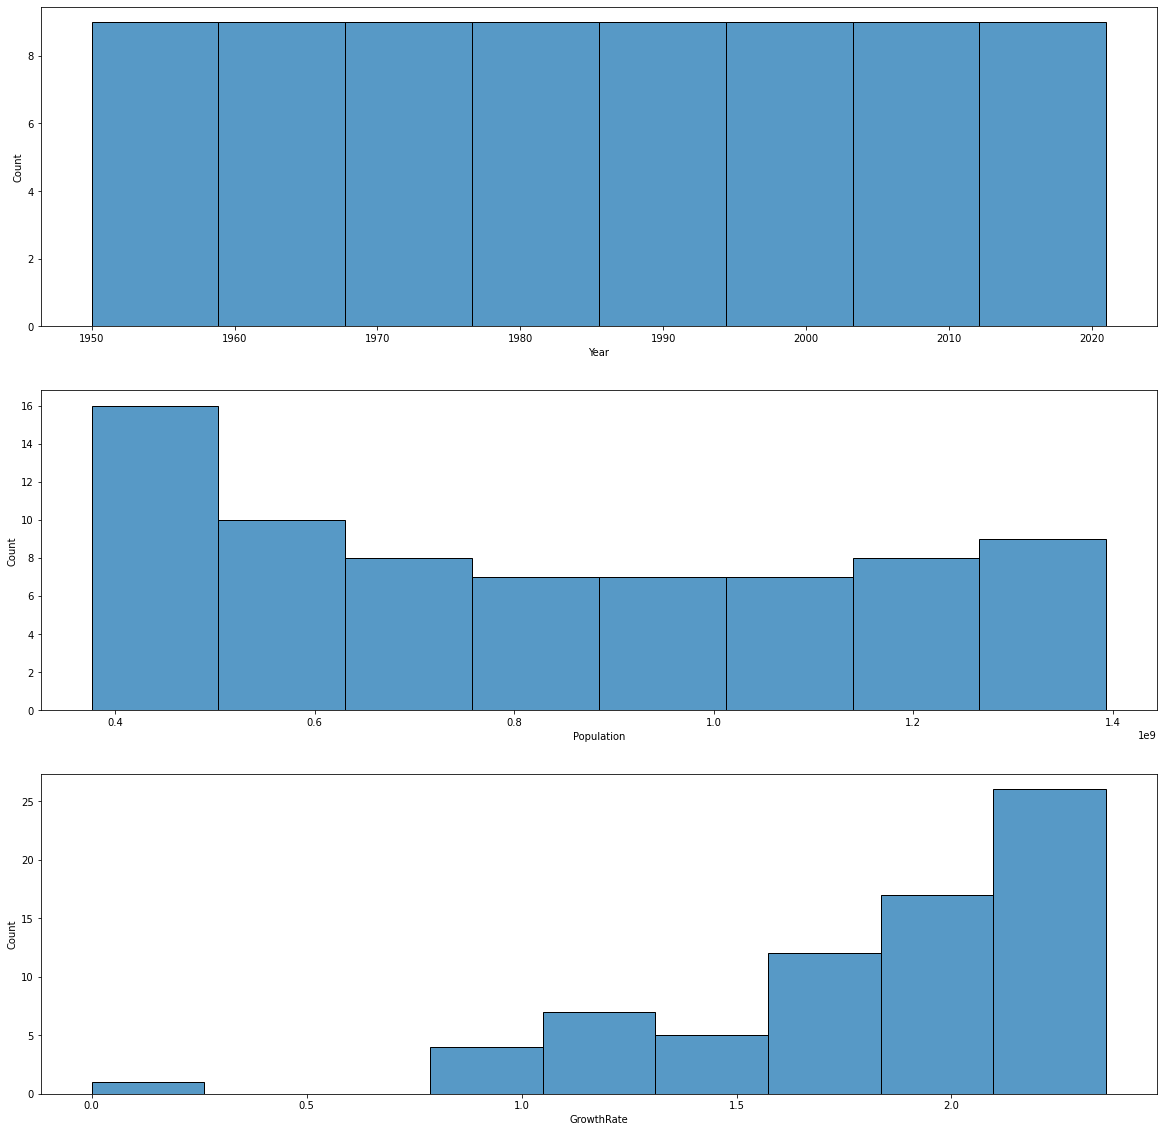

In [15]:
fig, ax = plt.subplots(3,1, figsize = (20,20))
for idx, cols in enumerate(train_df.columns.to_list()):
    sns.histplot(x = cols, data = train_df, ax = ax[idx] )

# Multivariate Analysis

<AxesSubplot:xlabel='Year', ylabel='Population'>

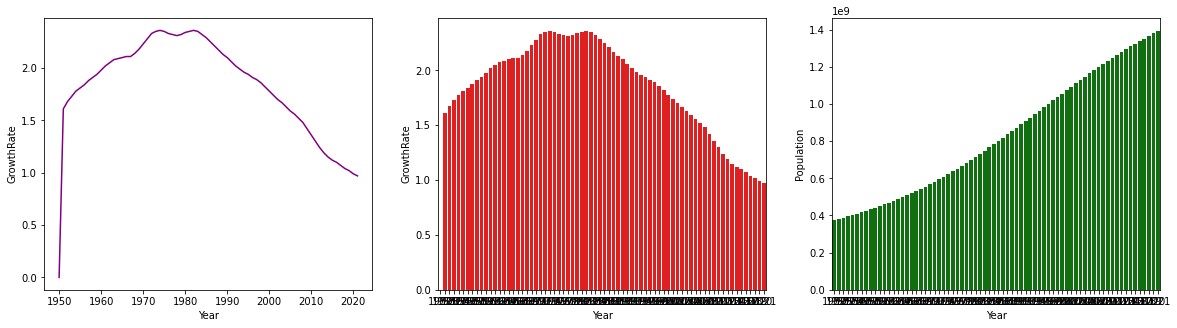

In [28]:
fig, ax = plt.subplots(1,3, figsize = (20,5))
sns.lineplot(x='Year', y='GrowthRate', data = train_df, ax = ax[0], color = "purple") 
sns.barplot(x='Year', y='GrowthRate', data = train_df, color='red', ax = ax[1]) 
sns.barplot(x='Year', y='Population', data = train_df, color='green', ax = ax[2])

From here we could see that the growth rate has increased and then has been decresing. This means that there has been more awareness lately. Good to know that population growth rate is declining.We could also that the population has been increasing since the start. But we can now see that the curve is not steep and started to be less steep which does make sense because the growth has started to decline. It will take too much time though for population to not as it is.

We can apply simple model to predict the future population. We can use linear regression. Randomforest which works best in most of the cases could also be used but even linear regression should work well.